<a href="https://colab.research.google.com/github/AashrithPemmaraju06/flipkart-customer-query-classification/blob/main/Flipkart_Customer_Query_Categorization_and_Prioritization_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Flipkart Customer Query Categorization and Prioritization using Machine Learning for Customer Satisfaction**

## **Done By - Aashrith Pemmaraju**
##**Date - 9th July, 2025**

# **Project Summary**

* **INTRODUCTION**

The **goal of this project is to classify customer queries into predefined categories and then sort them in each category according to the priority level based on the CSAT Score** using machine learning. Automating this process reduces the time taken to triage and route incoming queries, ultimately improving customer support efficiency.

The project follows the workflow — from data preprocessing to model evaluation, tuning, and finally deployment in a user-friendly web interface.

The steps taken to build the project are as follows :

🔹 **STEP 1 : DATA PREPROSSESSING AND FEATURE EXTRACTION**

As we have a dataset of raw customer queries labeled with their respective categories (e.g., Billing, Complaint, Technical Issue). The unneccesary columns were dropped and null/missing values in the remaining columns were imputed. The priorities of the queries were set according to the CSAT Score given by the customers.

The raw text was preprocessed by:

* Lowercasing

* Removing punctuation and stopwords

After preprocessing, we used **TF-IDF Vectorization** to convert the text into numerical features. TF-IDF helps identify how important a word is in a query relative to other queries in the dataset.

🔹 **STEP 2 : MODEL SELECTION AND EVALUATION**

We selected three classical machine learning algorithms to train and compare:

* **Multinomial Naive Bayes**

* **Logistic Regression**

* **Support Vector Machine using LinearSVC**

Each model was initially trained with default hyperparameters and evaluated on test data. Performance was measured using accuracy and weighted F1-score.

🔹 **STEP 3 : CROSS VALIDATION AND HYPERPARAMETER TUNING**

We used **GridSearchCV** to perform hyperparameter tuning and cross-validation in one step. The objective was to improve generalization and find the best-performing version of each model.

* For Naive Bayes, we tuned the alpha smoothing parameter.

* For Logistic Regression, we tuned C.

* For SVM, we tested several values of C.

**The Accuracies After Tuning are:**

* **Naive Bayes :	96.09%	(alpha = 0.1)**

* **Logistic Regression :	99.46%	(C = 10)**

* **SVM (LinearSVC)	: 99.52% (C = 1)**

The **SVM model** slightly outperformed the others and was selected as the **final model**.

🔹 **STEP 4 : EVALUATION AND COMPARISION**

We generated **confusion matrices and classification reports** for all models, before and after tuning. This helped identify where models made mistakes and which classes were harder to predict.

Despite the high performance of Logistic Regression, the **SVM model had a slight edge in both accuracy and F1 score**, and showed more stable behavior across validation folds.

Then the queries in each category were sorted with the highest priority query visible to the service agent first.

🔹 **STEP 5 : STREAMLIT APP DEVELOPMENT**

To make the classifier interactive, we built a **web app using Streamlit**.

The Key features are:

* Users can enter a customer query

* The trained SVM model predicts and displays the category

* Built-in validation to prevent empty inputs

The model and TF-IDF vectorizer were saved using joblib and loaded in the app.

🔹 **STEP 6 : PREPARING FOR DEPLOYMENT**

We organized the project with:

* app.py (main Streamlit script)

* svm_model.pkl, tfidf_vectorizer.pkl and label_encoder.pkl

* requirements.txt listing dependencies

All files were **pushed to GitHub, allowing deployment on Streamlit Cloud**.

**CONCLUSION**

This project demonstrates how  ML models, when combined with proper preprocessing and evaluation, can perform exceptionally well on text classification tasks. With **99.52% accuracy** and real-time predictions via Streamlit, this solution is production-ready and easily extendable.

#**Project Report Link**

https://drive.google.com/file/d/1i18vuNhh2Ld8vrJ34nQXmYnTEzDijwBP/view?usp=sharing

#**Github Link -**

https://github.com/AashrithPemmaraju06/flipkart-customer-query-classification


#**Problem Statement**

Flipkart is one of the India's largest e-commerce platforms, hence it receives thousands of customer service queries every day. These queries may be related to several variety of issues such as:

*   Return requests
*   Payment/Transaction issues
*   Delayed Deliveries
*   Refund Requests and many more..

Currently, these issues are manually reviewed and classified by customer support agents based on the type of problem raised. However, this process is:

*   Time Consuming
*   Prone to errors
*   Difficult in large scale businesses

Hence, the aim of my project is to create a text classification model based on machine learning that can classify the customers queries automatically into
pre-defined categories and then sort the queries in each category according to the priority (based on CSAT Score).

Implementing this project will help Flipkart to:

1. Automate the query routing into the pre-defined categories
2. Reduce response time
3. Increase overall efficiency

These improvements are expected to enhance customer satisfaction and deliver a more responsive support experience.














#**1. Knowing the Data**

##1.1 Importing Necessary Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd

##1.2 Loading and Viewing the Dataset

In [ ]:
#Loading the Dataset
df=pd.read_csv("/content/Customer_support_data.csv")

In [ ]:
#Number of rows and columns in the dataset
df.shape

(85907, 20)

In [ ]:
#Displays first 10 rows of dataset
df.head(10)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01-08-2023 15:13,01-08-2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01-08-2023 15:31,01-08-2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01-08-2023 16:17,01-08-2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01-08-2023 21:03,01-08-2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01-08-2023 23:31,01-08-2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


In [ ]:
#Display all the column names in the dataset as a python list
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

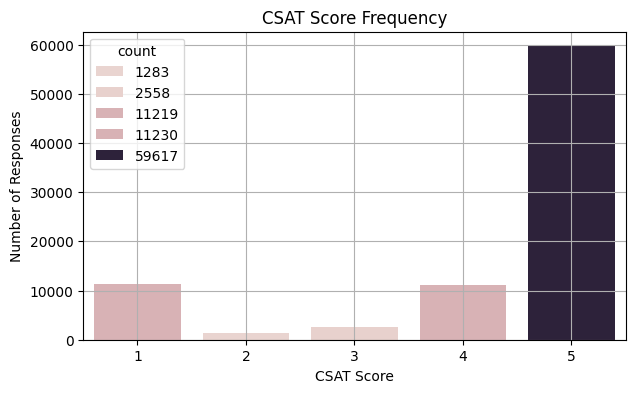

In [ ]:
# Bar Chart to see the CSAT Score Frequency

import matplotlib.pyplot as plt
import seaborn as sns

csat_counts = df['CSAT Score'].value_counts().sort_index()

plt.figure(figsize=(7, 4))
sns.barplot(x=csat_counts.index, y=csat_counts.values, hue = csat_counts)

plt.title('CSAT Score Frequency')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.show()


In [ ]:
#Displays the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

##1.3 Check Missing Values/Duplicate Rows in the dataset

In [ ]:
#Displays number of null values in each column of dataset
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


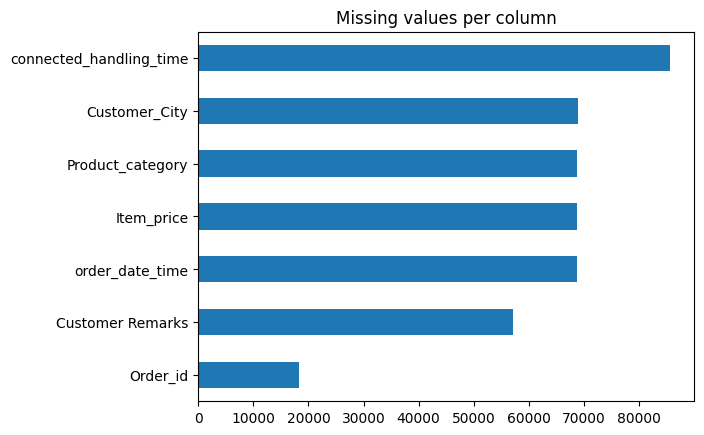

In [ ]:
# Bar Chart to see the missing values per column

import seaborn as sns
import matplotlib.pyplot as plt

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values().plot(kind='barh')
plt.title("Missing values per column")
plt.show()

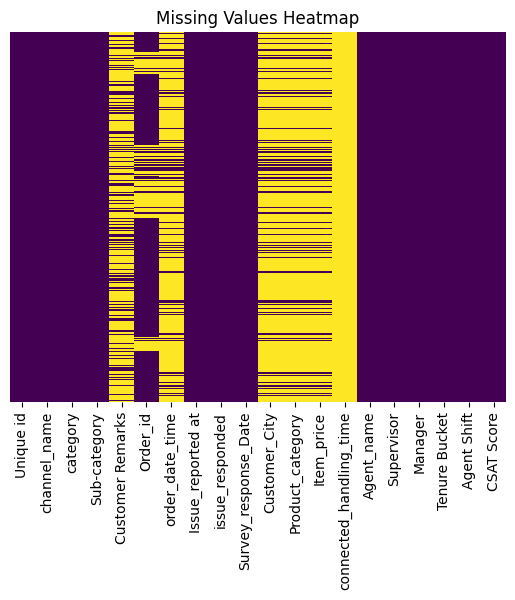

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting heatmap for missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
duplicate_rows=df.duplicated().sum()
print("Number of duplicate rows are",duplicate_rows)

Number of duplicate rows are 0


## **Dataset Description**

The dataset named **Customer_support_data.csv** contains information about the different customer queries sent to Flipkart's customer support.

It consists of **85907** rows and **20** columns

The dataset has the following columns:
* **Unique id** : Unique identifier for each record

* **Channel Name** : Name of the customer service channel

* **Category** : Category of interaction

* **Sub-Category** : Sub-Category of interaction

* **Order id** : Identifier for the order associated with the interaction

* **Order Date Time** : Date and time of the order

* **Issue Reported at** : Timestamp when the issue was reported

* **Issue Responded** : Timestamp when the issue was responded to

* **Survey Response Date** : Date of the customer survey response

* **Customer City** : City of the customer

* **Product Category** : Category of the product

* **Item Price** : Price of the item

* **Connected Handling Time** : Time taken to handle the interaction

* **Agent Name** : Name of the customer service agent

* **Supervisor** : Name of the supervisor

* **Manager** : Name of the manager

* **Tenure Bucket** : Bucket categorizing agent tenure

* **Agent Shift** : Shift timing of the agent

* **CSAT Score** : Customer Satisfaction (CSAT) score

In the above mentioned columns,  **7 columns** named -
* Customer Remarks
* Order id
* Order Date Time
* Customer City
* Product Category
* Item Price
* Connected Handling time

have null/missing values.

There are no duplicate rows in the whole dataset.







# **2. Understanding the Variables**

In [ ]:
# Checking the data types of each column

df.dtypes

,0
Unique id,object
channel_name,object
category,object
Sub-category,object
Customer Remarks,object
Order_id,object
order_date_time,object
Issue_reported at,object
issue_responded,object
Survey_response_Date,object


In [ ]:
# Summary of all columns

df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09-08-2023 11:55,13-08-2023 10:40,28-08-2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


##**Variables Description**

* **Unique id** : Unique identifier for each record

* **Channel Name** : Name of the customer service channel

* **Category** : Category of interaction

* **Sub-Category** : Sub-Category of interaction

* **Order id** : Identifier for the order associated with the interaction

* **Order Date Time** : Date and time of the order

* **Issue Reported at** : Timestamp when the issue was reported

* **Issue Responded** : Timestamp when the issue was responded to

* **Survey Response Date** : Date of the customer survey response

* **Customer City** : City of the customer

* **Product Category** : Category of the product

* **Item Price** : Price of the item

* **Connected Handling Time** : Time taken to handle the interaction

* **Agent Name** : Name of the customer service agent

* **Supervisor** : Name of the supervisor

* **Manager** : Name of the manager

* **Tenure Bucket** : Bucket categorizing agent tenure

* **Agent Shift** : Shift timing of the agent

* **CSAT Score** : Customer Satisfaction (CSAT) score

In [ ]:
# Overall number of unique values in each column

df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


In [ ]:
# Checking the frequency of all the unique values in each column

for i in df.columns:
  print(df[i].value_counts())
  print('-'*50)
  print('')

Unique id
07c7a878-0d5a-42e0-97ef-de59abec0238    1
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f    1
b07ec1b0-f376-43b6-86df-ec03da3b2e16    1
c0d72065-e4c8-449b-9d55-cadb690b9c54    1
49e1675a-e890-4d27-93a0-51e67a44d86a    1
                                       ..
372b51a5-fa19-4a31-a4b8-a21de117d75e    1
11a3ffd8-1d6b-4806-b198-c60b5934c9bc    1
1cfde5b9-6112-44fc-8f3b-892196137a62    1
ba903143-1e54-406c-b969-46c52f92e5df    1
eb0d3e53-c1ca-42d3-8486-e42c8d622135    1
Name: count, Length: 85907, dtype: int64
--------------------------------------------------

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64
--------------------------------------------------

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/

In [ ]:
# Only the top 5 unique values with most frequency in the column

for i in df.columns:
  print(df[i].value_counts().head())
  print('-'*50)
  print('')

Unique id
07c7a878-0d5a-42e0-97ef-de59abec0238    1
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f    1
b07ec1b0-f376-43b6-86df-ec03da3b2e16    1
c0d72065-e4c8-449b-9d55-cadb690b9c54    1
49e1675a-e890-4d27-93a0-51e67a44d86a    1
Name: count, dtype: int64
--------------------------------------------------

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64
--------------------------------------------------

category
Returns              44097
Order Related        23215
Refund Related        4550
Product Queries       3692
Shopzilla Related     2792
Name: count, dtype: int64
--------------------------------------------------

Sub-category
Reverse Pickup Enquiry    22389
Return request             8523
Delayed                    7388
Order status enquiry       6922
Installation/demo          4116
Name: count, dtype: int64
--------------------------------------------------

Customer Remarks
Good          1390
Good          1158
Very good      569
Nice         

#**3. Data Wrangling and Cleaning**

In [ ]:
# Removing unnecessary columns from the dataset

columns_to_drop = ['Unique id', 'Order_id', 'Agent_name', 'Supervisor', 'Manager','Customer_City', 'order_date_time', 'Issue_reported at',
                   'issue_responded', 'Survey_response_Date', 'channel_name','Item_price', 'connected_handling_time', 'Tenure Bucket',
                   'Agent Shift']
df_cleaned = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [ ]:
df_cleaned.isnull().sum()

,0
category,0
Sub-category,0
Customer Remarks,57165
Product_category,68711
CSAT Score,0


In [ ]:
# Replacing blank(null) in column Customer Remarks with "No Remarks"

df_cleaned['Customer Remarks'] = df_cleaned['Customer Remarks'].fillna('No Remarks')

In [ ]:
df_cleaned[df_cleaned['Customer Remarks']=='No Remarks']

,category,Sub-category,Customer Remarks,Product_category,CSAT Score
0,Product Queries,Life Insurance,No Remarks,NaN,5
1,Product Queries,Product Specific Information,No Remarks,NaN,5
2,Order Related,Installation/demo,No Remarks,NaN,5
3,Returns,Reverse Pickup Enquiry,No Remarks,NaN,5
4,Cancellation,Not Needed,No Remarks,NaN,5
...,...,...,...,...,...
85900,Order Related,Delayed,No Remarks,Books & General merchandise,5
85901,Order Related,Order status enquiry,No Remarks,Mobile,5
85902,Refund Related,Refund Enquiry,No Remarks,NaN,4
85905,Feedback,UnProfessional Behaviour,No Remarks,NaN,4


In [ ]:
# Handling missing values in the 'Product_category' column by replacing them with the placeholder 'Unknown Category'

df_cleaned['Product_category']=df['Product_category'].fillna('Unknown Category')
df_cleaned[df_cleaned['Product_category']=='Unknown Category']

,category,Sub-category,Customer Remarks,Product_category,CSAT Score
0,Product Queries,Life Insurance,No Remarks,Unknown Category,5
1,Product Queries,Product Specific Information,No Remarks,Unknown Category,5
2,Order Related,Installation/demo,No Remarks,Unknown Category,5
3,Returns,Reverse Pickup Enquiry,No Remarks,Unknown Category,5
4,Cancellation,Not Needed,No Remarks,Unknown Category,5
...,...,...,...,...,...
85902,Refund Related,Refund Enquiry,No Remarks,Unknown Category,4
85903,Order Related,Seller Cancelled Order,Supported team customer executive good,Unknown Category,5
85904,Order Related,Order status enquiry,need to improve with proper details.,Unknown Category,5
85905,Feedback,UnProfessional Behaviour,No Remarks,Unknown Category,4


In [ ]:
#Rechecking if any more null/missing values left in any column
df_cleaned.isnull().sum()

,0
category,0
Sub-category,0
Customer Remarks,0
Product_category,0
CSAT Score,0


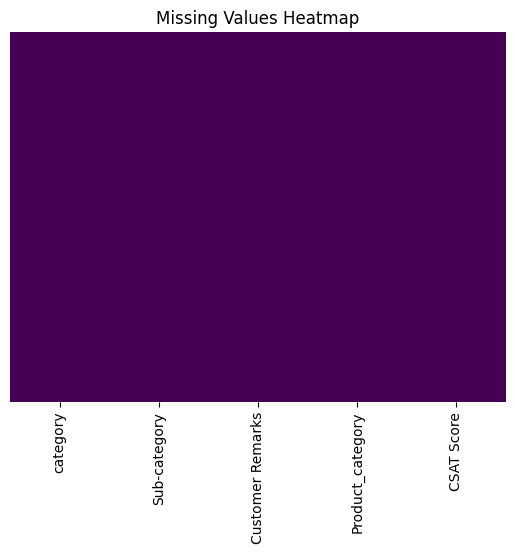

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting heatmap for missing data
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Normalizing the text columns (lowercasing and removing spaces)

columns_to_normalize=['category','Sub-category','Product_category']
for col in columns_to_normalize:
  df_cleaned[col]=df_cleaned[col].str.lower().str.strip()

In [ ]:
# Combining columns to increase the model's predictablility

df_cleaned['Combined_Column']=(df_cleaned['Customer Remarks']+' '
                                +df_cleaned['Sub-category']+' '
                                +df_cleaned['Product_category'])
df_cleaned['Combined_Column'].head()

,Combined_Column
0,No Remarks life insurance unknown category
1,No Remarks product specific information unknow...
2,No Remarks installation/demo unknown category
3,No Remarks reverse pickup enquiry unknown cate...
4,No Remarks not needed unknown category


In [ ]:
# Removing the 3 seperate columns and just keep the combined column

df_cleaned=df_cleaned[['category','Combined_Column','CSAT Score']]
df_cleaned.head(10)

,category,Combined_Column,CSAT Score
0,product queries,No Remarks life insurance unknown category,5
1,product queries,No Remarks product specific information unknow...,5
2,order related,No Remarks installation/demo unknown category,5
3,returns,No Remarks reverse pickup enquiry unknown cate...,5
4,cancellation,No Remarks not needed unknown category,5
5,returns,No Remarks fraudulent user unknown category,5
6,product queries,No Remarks product specific information unknow...,5
7,returns,Very good exchange / replacement unknown category,5
8,returns,Shopzilla app and it's all coustomer care serv...,5
9,shopzilla related,No Remarks general enquiry unknown category,5


In [ ]:
  # Priority level is set according to the CSAT Scores given by the customers

  def set_priority(score):
      if score <= 2:
          return 'High'
      elif score == 3:
          return 'Medium'
      else:
          return 'Low'

  df_cleaned.loc[:, 'Priority'] = df_cleaned['CSAT Score'].apply(set_priority)

/tmp/ipython-input-30-4290589430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Priority'] = df_cleaned['CSAT Score'].apply(set_priority)


In [ ]:
df_cleaned['Priority'].value_counts()

,count
Priority,
Low,70836
High,12513
Medium,2558


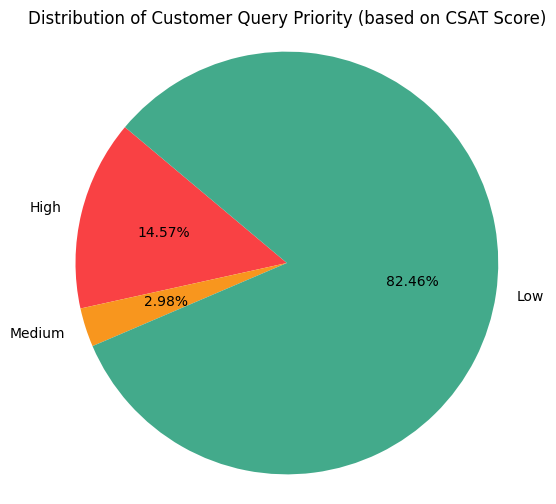

In [ ]:
# Visualizing the Distribution of Customer Query Priority (based on CSAT)

import matplotlib.pyplot as plt

priority_counts = df_cleaned['Priority'].value_counts().reindex(['High', 'Medium', 'Low'])

plt.figure(figsize=(6, 6))
plt.pie(priority_counts, labels=priority_counts.index, autopct='%.2f%%', startangle=140, colors=['#f94144', '#f8961e', '#43aa8b'])
plt.title("Distribution of Customer Query Priority (based on CSAT Score)")
plt.axis('equal')
plt.show()

## **Manipulations Performed**

* Removed unnecessary columns for the model as they might just increase noise and are not required for our model's target
prediction

* Checked the Number of missing/null values in each column and replaced null values with '**No remarks**' in Customer Remarks column and '**Unknown Category**' in Product Category column

* Normalized the categorical text columns like **category, sub-category, product category** to lowercase and stripped whitespaces to improve consistency

* Merged columns **Customer Remarks,sub-category, product category** into a single column called **Combined Column** to make the model understand the full issue

* Assigned priority status to each query based on the CSAT Scores given by the customers in their queries.

These manipulations gave the final clean data.



#**4. Data Visualization**

##**Chart 1**

/tmp/ipython-input-33-2527922476.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned,x='category',palette='Set1')


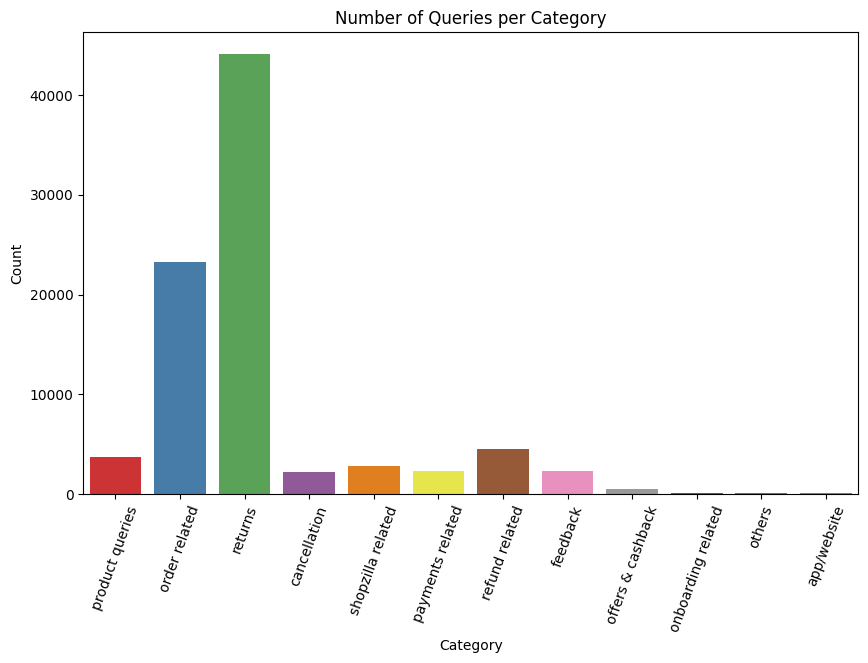

In [ ]:
# Bar Chart for number of queries per category

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned,x='category',palette='Set1')
plt.title('Number of Queries per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

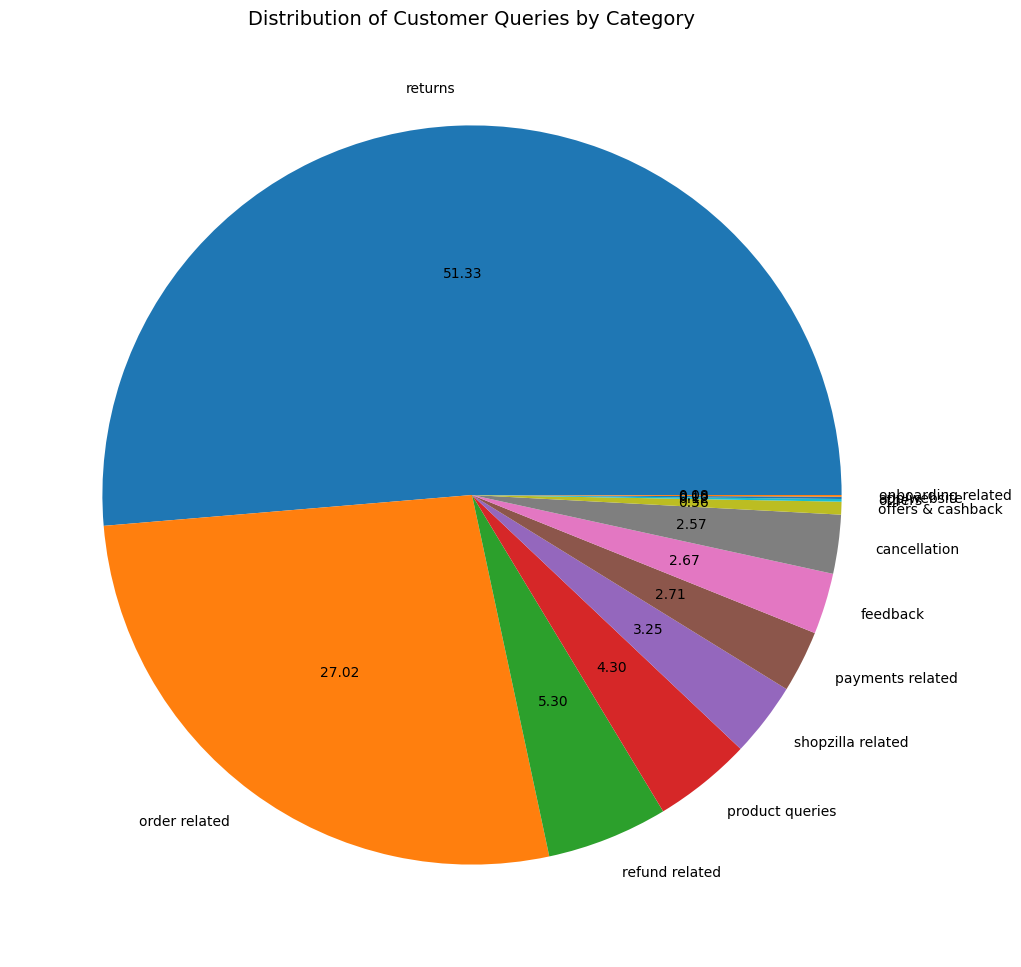

In [ ]:
category_counts = df_cleaned['category'].value_counts()

plt.figure(figsize=(12,12))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%.2f')

plt.title('Distribution of Customer Queries by Category', fontsize=14)
plt.show()


**Summary and Insights from this Bar Chart**

I chose a bar chart because it's the most effective way to visualize the frequency of how many customer queries fall into each complaint category like refund, return, cancellation, etc.

The bar chart revealed that some categories like **order related** and **return** have much higher counts than others.

On the other hand, categories like **app/website** had very few queries, indicating they are less common issues.

Hence I think the Flipkart's support team must:

* Prioritize automation for high-count issues

* Allocate more agents towards high complaint types




##**Chart 2**

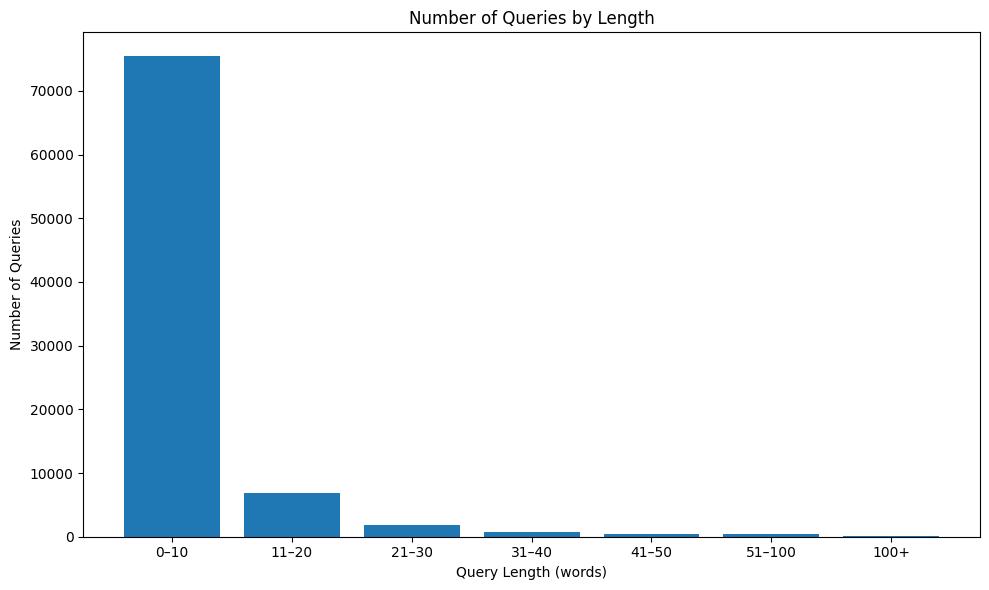

In [ ]:
# Bar Chart to visualize the number of queries lying in each word length range

df_cleaned['text_length'] = df_cleaned['Combined_Column'].apply(lambda x: len(str(x).split()))
bins = [0, 10, 20, 30, 40, 50, 100, 500]
labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–100', '100+']
df_cleaned['length_bucket'] = pd.cut(df_cleaned['text_length'], bins=bins, labels=labels, right=False)
length_counts = df_cleaned['length_bucket'].value_counts().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(length_counts.index, length_counts.values)
plt.title('Number of Queries by Length')
plt.xlabel('Query Length (words)')
plt.ylabel('Number of Queries')
plt.tight_layout()
plt.show()

I chose a bar chart because it clearly shows the distribution of complaint query lengths across different word count ranges.

The chart revealed :  
* Some queries are between the range of 31-50              
* Most queries are concentrated in the 0-20 word range
* Very long queries (over 100 words) are rare




##**Chart 3**

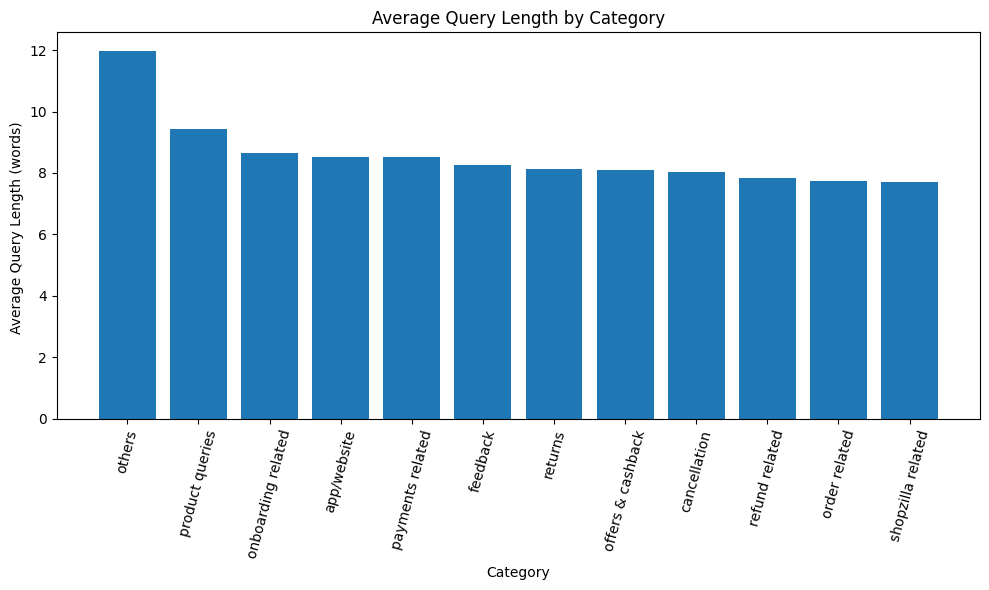

In [ ]:
# Bar Chart to visualize the average query length per category

df_cleaned['text_length'] = df_cleaned['Combined_Column'].apply(lambda x: len(str(x).split()))
avg_len_per_cat = df_cleaned.groupby('category')['text_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(avg_len_per_cat.index, avg_len_per_cat.values)
plt.title('Average Query Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Query Length (words) ')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


**Summary and Insights from this Bar Chart**

I chose a bar chart because it clearly shows the average query length for each customer query category, as bar charts are good to visualize numerical functions like averages on multiple categories

The chart revealed that more or less all the categories have almost the same average query length indicating customers provide same amount of explanation for each type of query in every defined category.

#**5. Hypothesis Testing**

##**Hypothesis Test 1**

**Hypothesis Statement**

Null Hypothesis - The word "return" is not present under the "returns" category.

Alternate Hypothesis - The word "return" is present under the "returns" category.

In [ ]:
# Chi-square Test to determine whether the word "return" in the customer's query is present under the "returns" category or not

from scipy.stats import chi2_contingency

df_cleaned['has_return'] = df_cleaned['Combined_Column'].str.contains(r'\breturn\b', case=False)
df_cleaned['is_return_category'] = df_cleaned['category'].str.lower() == 'return'

contingency_return = pd.crosstab(df_cleaned['has_return'], df_cleaned['is_return_category'])

chi2_return, p_return, dof_return, expected_return = chi2_contingency(contingency_return)
print("Chi-Square Test: 'return' vs 'Return' category")
print("Contingency Table:\n", contingency_return)
print(f"\nChi-square Statistic: {chi2_return}")
print(f"Degrees of Freedom: {dof_return}")
print(f"P-value: {p_return}")


Chi-Square Test: 'return' vs 'Return' category
Contingency Table:
 is_return_category  False
has_return               
False               76446
True                 9461

Chi-square Statistic: 0.0
Degrees of Freedom: 0
P-value: 1.0


**Test Used to Get P-value**

The test used to get the P-value is Chi-Square Test of Independence.

**Why this test?**

I used the Chi-square test as it is specifically designed to test whether two categorical variables are independent or associated.

Here,this test helps us determine whether the use of the keyword "return" can be considered for predicting the query category or not, which is useful in building a text classification model.

**Conclusion of the test**

As p value is 1.0 ,i.e, greater than 0.05, we **cannot reject the null hypothesis**.

This indicates that the word "return" is used broadly across categories, not
just within the "Returns" category.

##**Hypothesis Test 2**

**Hypothesis Statement**

Null Hypothesis - The word "cancel" is not present under the "cancellation" category.

Alternate Hypothesis - The word "cancel" is present under the "cancellation" category.

In [ ]:
# Chi-square Test to determine whether the word "cancel" in the customer's query is present under the "cancellation" category or not

from scipy.stats import chi2_contingency

df_cleaned['has_cancel'] = df_cleaned['Combined_Column'].str.contains(r'\bcancel\b', case=False)
df_cleaned['is_cancel_category'] = df_cleaned['category'].str.lower() == 'cancellation'

contingency2 = pd.crosstab(df_cleaned['has_cancel'], df_cleaned['is_cancel_category'])

chi2_2, p2, dof2, expected2 = chi2_contingency(contingency2)
print("Chi-Square Test 2 (cancel vs Cancellation category)")
print("Contingency Table:\n", contingency2)
print("Chi-square:", chi2_2)
print("Degrees of Freedom:", dof2)
print("P-value:", p2)


Chi-Square Test 2 (cancel vs Cancellation category)
Contingency Table:
 is_cancel_category  False  True 
has_cancel                      
False               83570   2196
True                  125     16
Chi-square: 39.89568727394584
Degrees of Freedom: 1
P-value: 2.678940562686988e-10


**Test Used to Get P-value**

The test used to get the P-value is Chi-Square Test of Independence.

**Why this test?**

I used the Chi-square test as it is specifically designed to test whether two categorical variables are independent or associated.

Here,this test helps us determine whether the use of the keyword "cancel" can be considered for predicting the query category or not, which is useful in building a text classification model.

**Conclusion of the test**

As p value is 2.68 × 10⁻¹⁰ (very small) ,i.e, very less than 0.05, we **can reject the null hypothesis**.

This indicates that the word "refund" is strongly associated with the 'cancellation' category.

##**Hypothesis Test 3**

Null Hypothesis - Priority is independent of query category

Alternate Hypothesis - Priority depends on category

In [ ]:
# Chi-square Test to determine whether priority depends on query category or not

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_cleaned['category'], df_cleaned['Priority'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)

Chi-square test statistic: 731.0493186163933
p-value: 2.168073648994195e-140


**Test Used to Get P-value**

The test used to get the P-value is Chi-Square Test of Independence.

**Why this test?**

I used the Chi-square test as it is specifically designed to test whether two categorical variables are independent or associated.

Here,this test helps us determine whether the category and priority variables are associated with each other or not.

**Conclusion**

As p value is 2.17 × 10⁻¹⁴⁰ (very small) ,i.e, very less than 0.05, we can reject the null hypothesis.

This indicates that the priority and the category of query are independent of each other

# **6. Feature Engineering & Data Pre-processing**

In [ ]:
# converting text in column Combined_Column to numerical features

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(df_cleaned['Combined_Column'])
print("TF-IDF feature matrix shape:", X_tfidf.shape)

TF-IDF feature matrix shape: (85907, 5000)


In [ ]:
# Converting Text Labels in column Category to numeric labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_cleaned['category'])

print("Encoded target values (y):", y_encoded[:10])
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded target values (y): [ 8  8  5 10  1 10  8 10 10 11]
Label mapping: {'app/website': np.int64(0), 'cancellation': np.int64(1), 'feedback': np.int64(2), 'offers & cashback': np.int64(3), 'onboarding related': np.int64(4), 'order related': np.int64(5), 'others': np.int64(6), 'payments related': np.int64(7), 'product queries': np.int64(8), 'refund related': np.int64(9), 'returns': np.int64(10), 'shopzilla related': np.int64(11)}


In [ ]:
# Splitting the dataset into training and testing sets (80% train, 20% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (68725, 5000)
X_test shape: (17182, 5000)
y_train shape: (68725,)
y_test shape: (17182,)


**Summary**

* Converted text in column Combined_Column to numerical features using TF-IDF as models can't understand raw text, hence TF-IDF converts words into numerical values

* Converted the text labels in column Category to numeric labels using label encoding as the target column (category) contains labels and label encoding converts each unique category into a single numeric value, which is useful for a multi class classification model

* Split the data into 80% training set (to train the model) and 20% testing set (to evaluate the model).

I have chosen the 80:20 ratio as we have a large dataset with 85907 customer queries, which indicates a huge dataset and more data is required to train multiple models to obtain maximum performance, and the 20% is also sufficient enough to evaluate the models.

#**7. ML Model Implementation**

##**ML Model - 1: Naive Bayes**

In [ ]:
# Fitting the model on the training data and predicting on test data

from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

In [ ]:
# Printing accuracy and the detailed classification report from the predicted data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb,digits=6,zero_division=0))

Accuracy: 0.9563496682574788
Classification Report:
               precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        17
           1   0.982051  0.866516  0.920673       442
           2   0.984444  0.965142  0.974697       459
           3   1.000000  0.760417  0.863905        96
           4   0.000000  0.000000  0.000000        13
           5   0.977607  0.987293  0.982426      4643
           6   0.000000  0.000000  0.000000        20
           7   0.986928  0.974194  0.980519       465
           8   0.984952  0.974290  0.979592       739
           9   0.996124  0.847253  0.915677       910
          10   0.935264  0.995918  0.964639      8820
          11   0.986607  0.396057  0.565217       558

    accuracy                       0.956350     17182
   macro avg   0.736165  0.647257  0.678946     17182
weighted avg   0.955290  0.956350  0.950721     17182



Got an **accuracy of 95.63%** and **F1 Score of 95.07%**, which are excellent

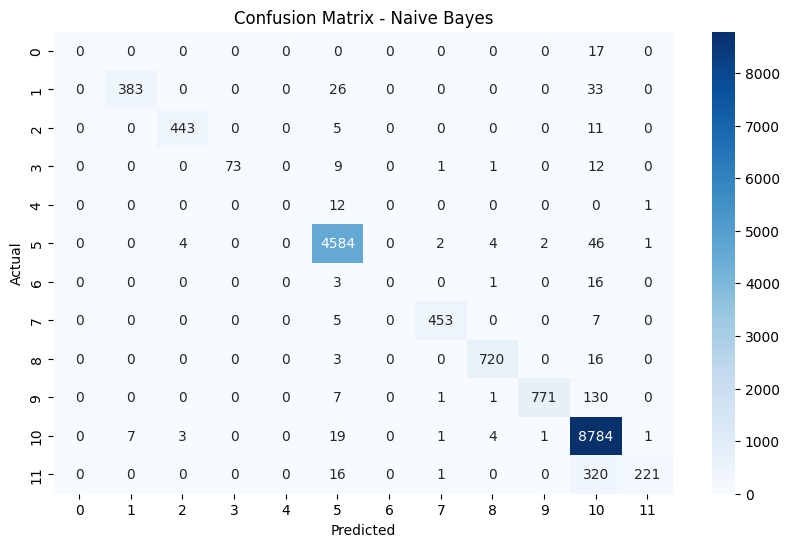

In [ ]:
# Visualizing the confusion matrix

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

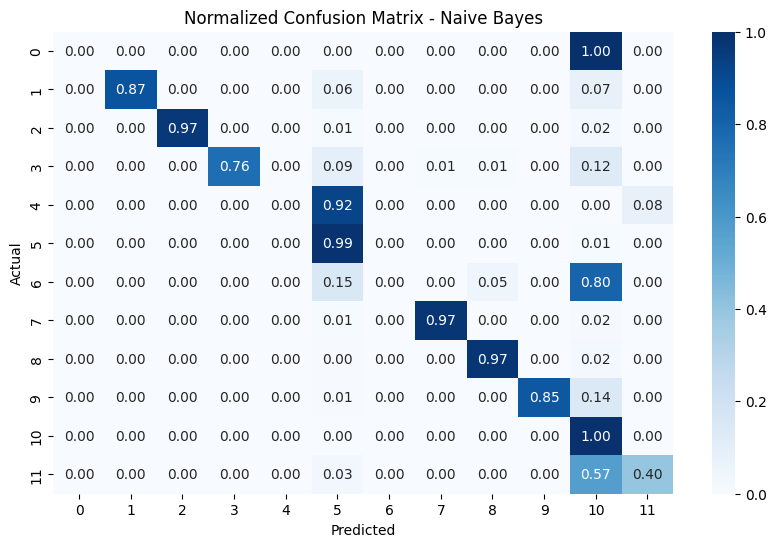

In [ ]:
# Normalized Confusion Matrix for the Naive Bayes Model

plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_nb, normalize='true')

sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Cross Validation and Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV (estimator=model_nb,param_grid=param_grid,cv=5,scoring='f1_weighted', n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)

print("Best alpha value found:", grid_search.best_params_)
print("Best cross-validated F1 score:", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best alpha value found: {'alpha': 0.1}
Best cross-validated F1 score: 0.9556


Best alpha value found: **0.1**

Best average F1-score across folds: **95.56%**


In [ ]:
# Evaluation of Best Naive Bayes Model on Test Set

best_nb_model = grid_search.best_estimator_
y_pred_best = best_nb_model.predict(X_test)

print("\nTest Accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best,digits=6))


Test Accuracy: 0.9609

Classification Report:
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        17
           1   0.995134  0.925339  0.958968       442
           2   0.995556  0.976035  0.985699       459
           3   0.957447  0.937500  0.947368        96
           4   0.769231  0.769231  0.769231        13
           5   0.982388  0.985139  0.983762      4643
           6   0.000000  0.000000  0.000000        20
           7   0.993407  0.972043  0.982609       465
           8   0.994536  0.985115  0.989803       739
           9   0.964455  0.894505  0.928164       910
          10   0.944109  0.992063  0.967492      8820
          11   0.983333  0.422939  0.591479       558

    accuracy                       0.960948     17182
   macro avg   0.798300  0.738326  0.758715     17182
weighted avg   0.960903  0.960948  0.956884     17182



Got an **accuracy of 96.09%** and **F1 Score of 95.68%**, which means that the tuning improved the model’s performance

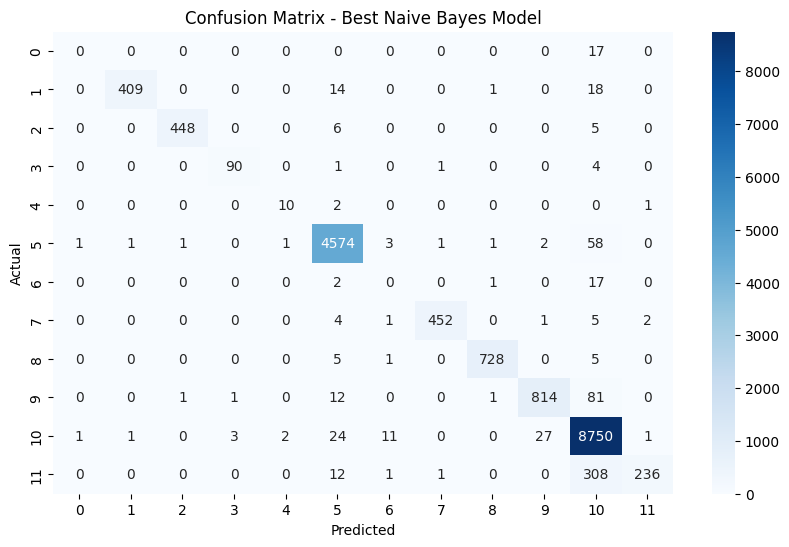

In [ ]:
# Confusion Matrix for the best Naive Bayes

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

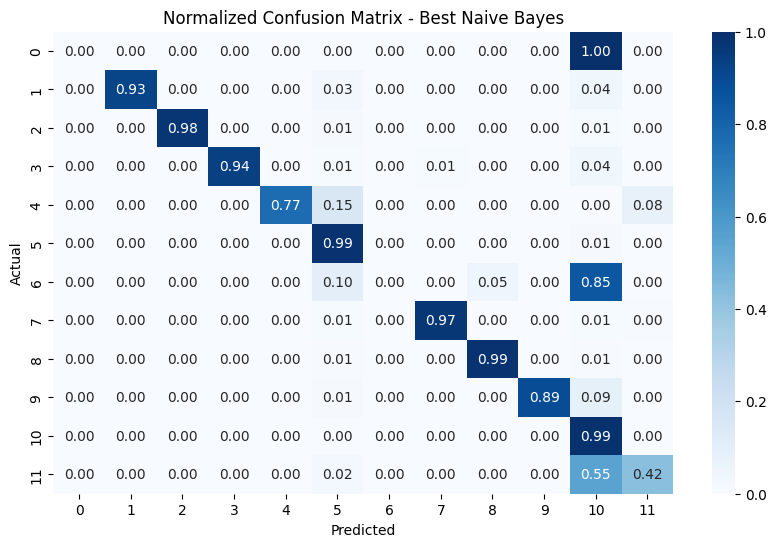

In [ ]:
# Normalized Confusion Matrix for the best Naive Bayes Model

plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_best, normalize='true')

sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix - Best Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###**Summary**

**MODEL PICKED AND TESTED**

I have picked the **Multinomial Naive Bayes** (NB) model as it is simple, fast and great for text classification when the features are TF-IDF (numeric) scores.

Upon Training and Testing the model, we got the following results

* **Accuracy : 95.6%**
* **Weighted F1 Score : 95.07%**

which are considered excellent.

**CROSS VALIDATION AND HYPERPARAMETER TUNING**

Then I have used the **GridSearchCV** Hyperparameter Optimization Technique as it completes cross-validation and hyperparameter tuning in one step.

We have chosen **weighted_F1 score** as the evaluation metric.

We found the **optimal hyperparameter** to be:
* **Best alpha : 0.1**

This hyperparameter gave:

* **Accuracy : 96.09%**
* **Weighted F1 Score : 95.68%**

**IMPROVEMENTS**

Improvements in the evaluation metrices are :

* **Accuracy : 95.6% -> 96.09%**
* **Weighted F1 Score : 95.07% -> 95.68%**

The **confusion matrices** and **Normalized Confusion Matrices** for the initial and final Naive Bayes Model have been plotted.

##**ML Model - 2: Logistic Regression**

In [ ]:
# Fitting the model on the training data and predicting on test data

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
# Print accuracy and classification report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(" Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred,digits=6))

 Logistic Regression Evaluation:
Accuracy: 0.9931905482481667
              precision    recall  f1-score   support

           0   1.000000  0.882353  0.937500        17
           1   1.000000  0.988688  0.994312       442
           2   1.000000  0.991285  0.995624       459
           3   1.000000  0.958333  0.978723        96
           4   1.000000  0.923077  0.960000        13
           5   0.994804  0.989662  0.992226      4643
           6   1.000000  0.550000  0.709677        20
           7   0.993506  0.987097  0.990291       465
           8   0.998641  0.994587  0.996610       739
           9   0.993377  0.989011  0.991189       910
          10   0.994358  0.999093  0.996720      8820
          11   0.942609  0.971326  0.956752       558

    accuracy                       0.993191     17182
   macro avg   0.993108  0.935376  0.958302     17182
weighted avg   0.993251  0.993191  0.993124     17182



Got an **accuracy of 99.31%** and **F1 Score of 99.31%**, which are excellent

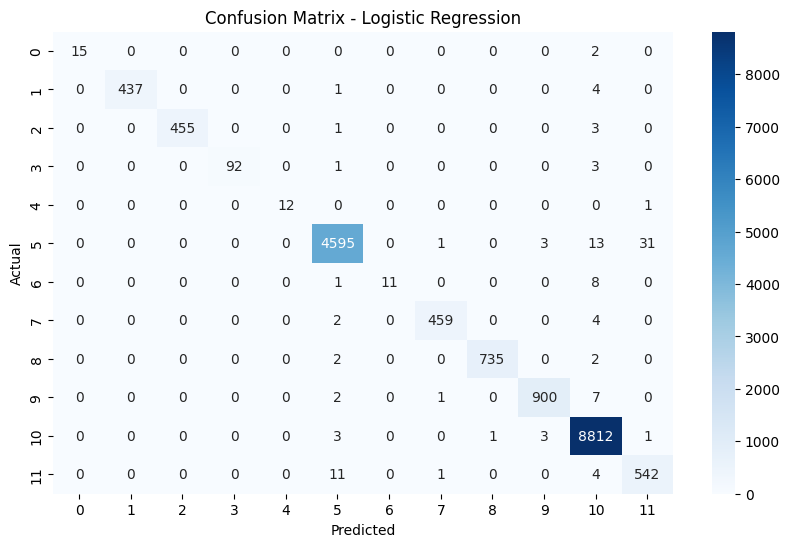

In [ ]:
# Visualizing the confusion matrix

cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

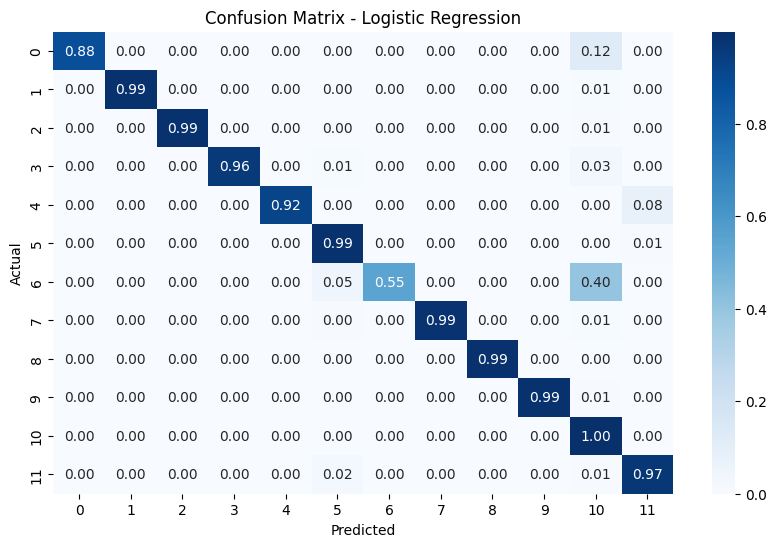

In [ ]:
# Visualizing the Normalized confusion matrix

cm = confusion_matrix(y_test, lr_pred,normalize='true')

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Cross Validation and Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10]}

grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5,scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Best Weighted F1-score:", grid.best_score_)

Best Params: {'C': 10}
Best Weighted F1-score: 0.9941016573481537


Best hyperparameters found:

**C: 10**

Best average weighted F1-score: **99.41%**

In [ ]:
# Printing accuracy and the detailed classification report from the predicted data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, best_pred))
print(classification_report(y_test, best_pred,digits=6))

Test Accuracy: 0.9946455593062508
              precision    recall  f1-score   support

           0   1.000000  0.941176  0.969697        17
           1   0.997732  0.995475  0.996602       442
           2   1.000000  1.000000  1.000000       459
           3   1.000000  0.979167  0.989474        96
           4   1.000000  0.923077  0.960000        13
           5   0.997179  0.989662  0.993406      4643
           6   1.000000  0.650000  0.787879        20
           7   0.991435  0.995699  0.993562       465
           8   0.995940  0.995940  0.995940       739
           9   0.992316  0.993407  0.992861       910
          10   0.996830  0.998413  0.997621      8820
          11   0.938776  0.989247  0.963351       558

    accuracy                       0.994646     17182
   macro avg   0.992517  0.954272  0.970033     17182
weighted avg   0.994751  0.994646  0.994626     17182



Got an **accuracy of 99.46%** and **F1 Score of 99.46%**, which means that the tuning improved the model’s performance

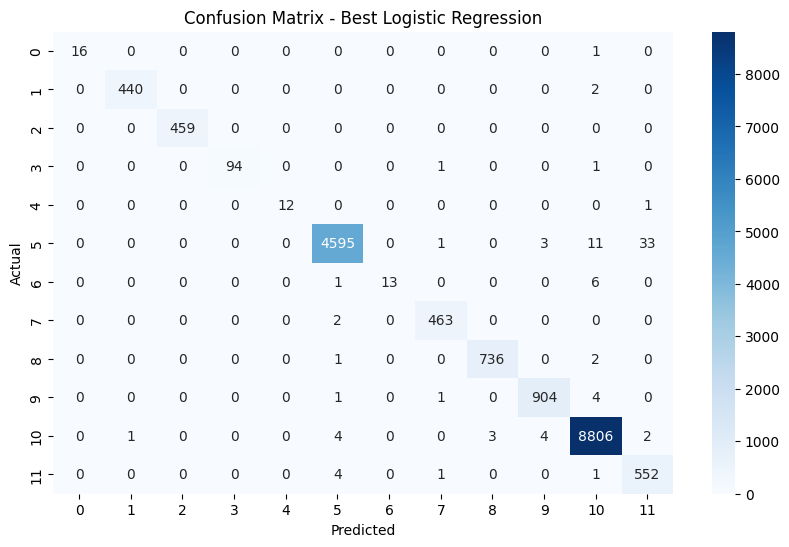

In [ ]:
# Visualizing the confusion matrix

cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

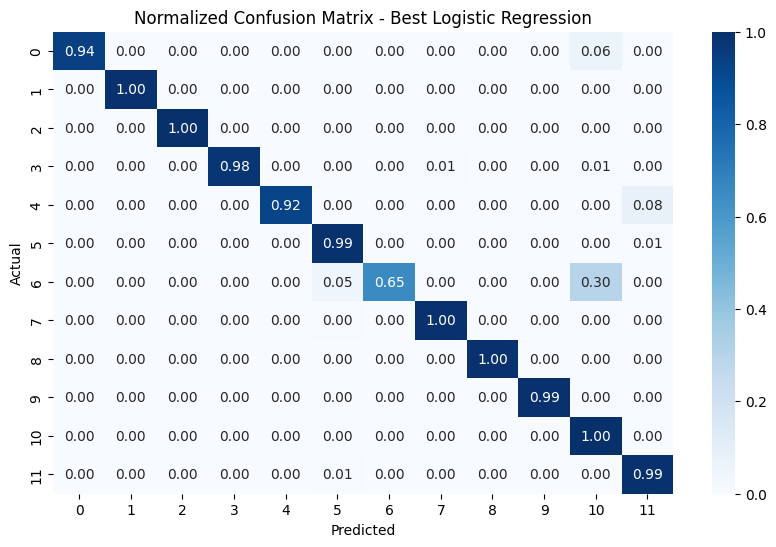

In [ ]:
# Visualizing the Normalized confusion matrix

cm = confusion_matrix(y_test, best_pred,normalize='true')

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix - Best Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###**Summary**

**MODEL PICKED AND TESTED**

I have picked the **Logistic Regression model**, as it is widely-used linear classifier that works well for text classification especially when working with feature spaces like TF-IDF.

Upon training and testing the model with default hyperparameters, we obtained the following results:

* **Accuracy: 99.31%**

* **Weighted F1 Score: 99.31%**

which is shows a very good performance.

**CROSS-VALIDATION AND HYPERPARAMETER TUNING**

I then applied **GridSearchCV**, which combines both hyperparameter tuning and cross-validation in a single step.

The evaluation metric used was **weighted F1-score**

We found the optimal hyperparameters to be:

* **C = 10**, Penalty = l2, Solver = lbfgs

These hyperparameters gave:

* **Best Cross-Validated Weighted F1 Score: 99.41%**

**IMPROVEMENTS**

The improvements in the model's performance after tuning are:

* **Accuracy : 99.31% -> 99.46%**

* **Weighted F1 Score: 99.31% -> 99.46%**


The **confusion matrices** and **Normalized Confusion Matrices** for the initial and final Logistic Regression Models have been plotted.

##**ML Model - 3 : Support Vector Machine**

In [ ]:
# Fitting the model on the training data and predicting on test data

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
# Printing accuracy and the detailed classification report from the predicted data

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred, digits=6))

Accuracy: 0.9952275637294844
              precision    recall  f1-score   support

           0   1.000000  0.941176  0.969697        17
           1   0.995475  0.995475  0.995475       442
           2   1.000000  1.000000  1.000000       459
           3   1.000000  0.979167  0.989474        96
           4   1.000000  0.923077  0.960000        13
           5   0.998045  0.989662  0.993836      4643
           6   0.937500  0.750000  0.833333        20
           7   0.991416  0.993548  0.992481       465
           8   0.995951  0.998647  0.997297       739
           9   0.994505  0.994505  0.994505       910
          10   0.997508  0.998639  0.998074      8820
          11   0.939189  0.996416  0.966957       558

    accuracy                       0.995228     17182
   macro avg   0.987466  0.963359  0.974261     17182
weighted avg   0.995331  0.995228  0.995232     17182



Got an **accuracy of 99.52%** and **F1 Score of 99.52%**, which are excellent

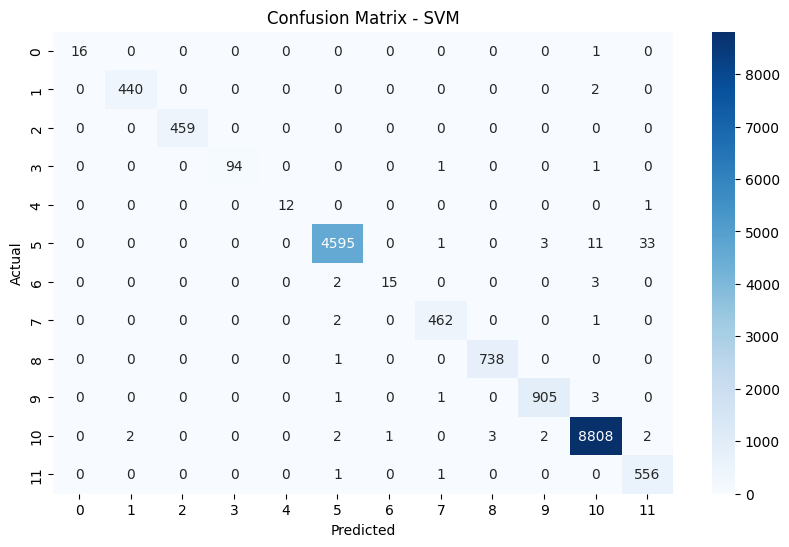

In [ ]:
# Visualizing the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)

plt.figure( figsize= (10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


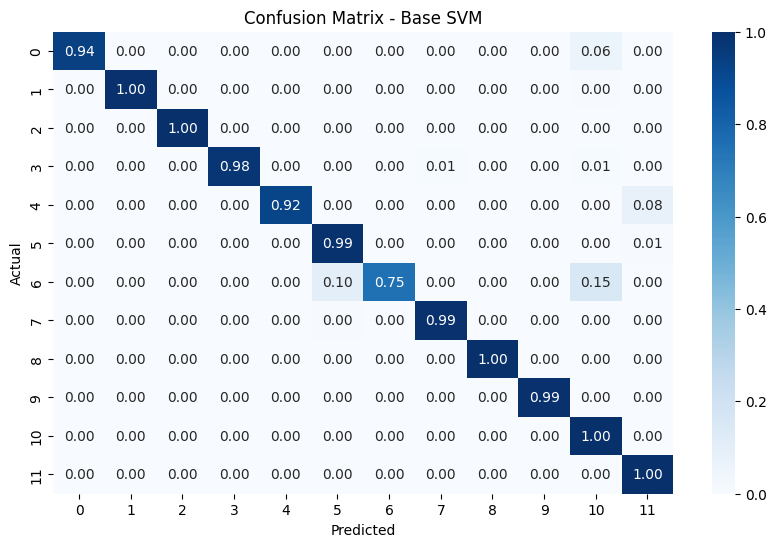

In [ ]:
# Visualizing the normalized confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred, normalize='true')

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("Confusion Matrix - Base SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Cross Validation and Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_svm = GridSearchCV(estimator=LinearSVC(max_iter=10000), param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best Params:", grid_svm.best_params_)
print("Best Weighted F1-score:", grid_svm.best_score_)

Best Params: {'C': 1}
Best Weighted F1-score: 0.9944570558152679


Best hyperparameters found:

**C: 1**

Best average weighted F1-score: **99.44%**

In [ ]:
# Printing accuracy and the detailed classification report from the predicted data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_svm_model = grid_svm.best_estimator_
svm_best_pred = best_svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, svm_best_pred))
print(classification_report(y_test, svm_best_pred, digits=6))

Accuracy: 0.9952275637294844
              precision    recall  f1-score   support

           0   1.000000  0.941176  0.969697        17
           1   0.995475  0.995475  0.995475       442
           2   1.000000  1.000000  1.000000       459
           3   1.000000  0.979167  0.989474        96
           4   1.000000  0.923077  0.960000        13
           5   0.998045  0.989662  0.993836      4643
           6   0.937500  0.750000  0.833333        20
           7   0.991416  0.993548  0.992481       465
           8   0.995951  0.998647  0.997297       739
           9   0.994505  0.994505  0.994505       910
          10   0.997508  0.998639  0.998074      8820
          11   0.939189  0.996416  0.966957       558

    accuracy                       0.995228     17182
   macro avg   0.987466  0.963359  0.974261     17182
weighted avg   0.995331  0.995228  0.995232     17182



Got an **accuracy of 99.52%** and **F1 Score of 99.52%**, which means that the base model was already optimal

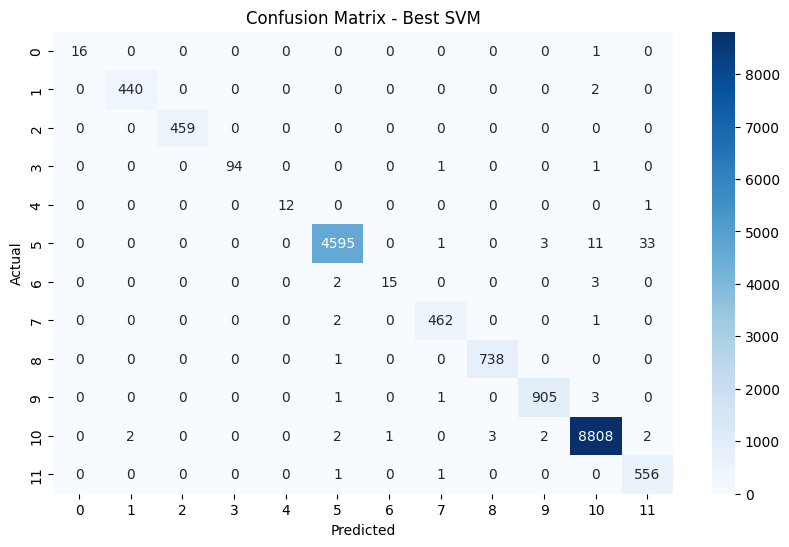

In [ ]:
# Visualizing the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_best_pred)

plt.figure( figsize= (10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


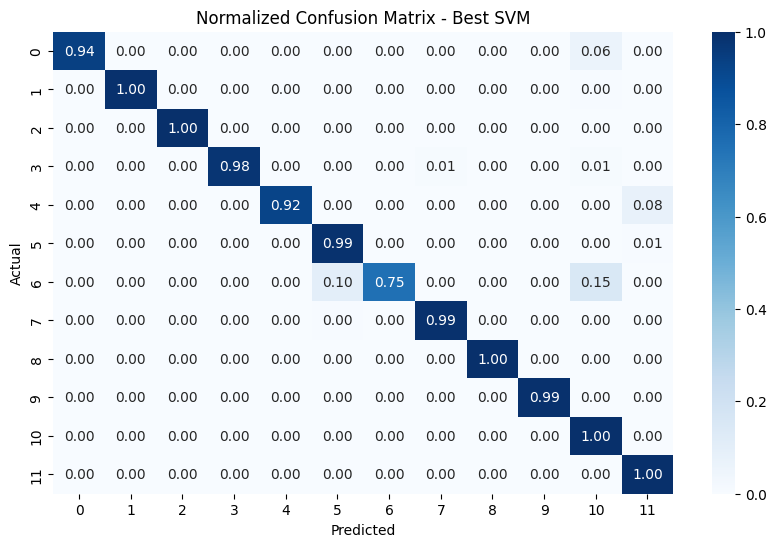

In [ ]:
# Visualizing the Normalized confusion matrix

cm = confusion_matrix(y_test, svm_best_pred, normalize='true')

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix - Best SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**MODEL PICKED AND TESTED**

I have picked the **Support Vector Machine model** using LinearSVC, as it is widely-used  for text classification especially when working with feature spaces like TF-IDF.

Upon training and testing the model with default hyperparameters, we obtained the following results:

* **Accuracy: 99.52%**

* **Weighted F1 Score: 99.52%**

which is shows excellent performance.

**CROSS-VALIDATION AND HYPERPARAMETER TUNING**

I then applied **GridSearchCV**, which combines both hyperparameter tuning and cross-validation in a single step.

The evaluation metric used was **weighted F1-score**

We found the optimal hyperparameters to be:

* **C = 1**

These hyperparameters gave:

* **Best Cross-Validated Weighted F1 Score: 99.44%**

**IMPROVEMENTS**

There were **no improvements** in the model after tuning, the accuracy stayed the same, i.e, **99.52%**, which means the base model itself is the optimal and best version of the model.


The **confusion matrices** and **Normalized Confusion Matrices** for the initial and final Logistic Regression Models have been plotted.

#**8. Setting Priority Queue**



In [ ]:
# Define sorting order
priority_order = {'High': 0, 'Medium': 1, 'Low': 2}
df_cleaned['Priority_Sort'] = df_cleaned['Priority'].map(priority_order)

# Sort by both category and priority
df_sorted = df_cleaned.sort_values(['category', 'Priority_Sort'])

# Drop the helper column after sorting
df_sorted = df_sorted.drop(columns='Priority_Sort')

# View top 10 entries
df_sorted[['category', 'Combined_Column', 'CSAT Score', 'Priority']].head(10)

,category,Combined_Column,CSAT Score,Priority
10242,app/website,In my journey with you now feel very bad. iss...,1,High
19824,app/website,None of the Milks are getting added to my cart...,1,High
22492,app/website,Bad customer support issues with shopzilla ap...,1,High
25345,app/website,call are disconted my issue are not solved iss...,1,High
29501,app/website,No Remarks app/website related unknown category,1,High
31142,app/website,No Remarks issues with shopzilla app unknown c...,1,High
37784,app/website,No Remarks issues with shopzilla app unknown c...,1,High
47565,app/website,No Remarks issues with shopzilla app unknown c...,1,High
48872,app/website,No Remarks issues with shopzilla app unknown c...,1,High
61683,app/website,No Remarks issues with shopzilla app unknown c...,1,High


In [ ]:
df_sorted[['category', 'Combined_Column', 'CSAT Score', 'Priority']].tail(10)

,category,Combined_Column,CSAT Score,Priority
85521,shopzilla related,Ok general enquiry unknown category,5,Low
85536,shopzilla related,No Remarks general enquiry unknown category,4,Low
85594,shopzilla related,No Remarks general enquiry unknown category,5,Low
85605,shopzilla related,No Remarks general enquiry unknown category,5,Low
85630,shopzilla related,No Remarks shopzilla rewards unknown category,5,Low
85672,shopzilla related,Dedicated customer care helpline should be kep...,5,Low
85712,shopzilla related,No Remarks shopzila premium related unknown ca...,5,Low
85753,shopzilla related,Nothing.....I felt a good communication ...nd ...,5,Low
85785,shopzilla related,No Remarks shopzilla rewards unknown category,5,Low
85820,shopzilla related,Ok general enquiry unknown category,5,Low


#**9. Deployment**

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Saving best model (SVM) and vectorizer

import joblib

joblib.dump(best_svm_model,'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [ ]:
from google.colab import files
files.download('svm_model.pkl')
files.download('tfidf_vectorizer.pkl')
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>